# Day 4 — Overfitting & Regularization
We study L1/L2 penalties, Dropout, and Early Stopping.

## Step 1: Load Data

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers #type:ignore
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## Step 2: Define Model with Regularization

In [2]:
def build_model():
    return keras.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])

model = build_model()
model.summary()

d:\40-Days-DL-MLOps\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Train Model with Early Stopping

In [6]:
# Step 1: Define Early Stopping BEFORE training
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)

# Step 2: Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Step 3: Train with Early Stopping
history = model.fit(x_train, y_train, epochs=30, batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8546 - loss: 0.7672 - val_accuracy: 0.9533 - val_loss: 0.3876
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9286 - loss: 0.4445 - val_accuracy: 0.9578 - val_loss: 0.3166
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9375 - loss: 0.3836 - val_accuracy: 0.9645 - val_loss: 0.2722
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9403 - loss: 0.3617 - val_accuracy: 0.9679 - val_loss: 0.2685
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9430 - loss: 0.3485 - val_accuracy: 0.9691 - val_loss: 0.2541
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9430 - loss: 0.3448 - val_accuracy: 0.9691 - val_loss: 0.2556
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9443 - loss: 0.3373 - val_accuracy: 0.9670 - val_loss: 0.2552
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9460 - loss: 0.3338 - val_accuracy: 

## Step 4: Plot Training vs Validation Accuracy

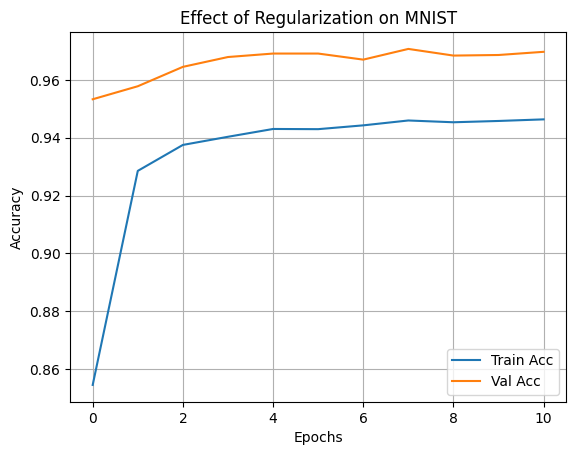

In [7]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Effect of Regularization on MNIST")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Evaluate Model

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final Test Accuracy:", test_acc)

Final Test Accuracy: 0.9707000255584717
